# Acquire and Analyze Project

# Initialize Twitter API 

In [1]:
import tweepy
import pandas as pd
import tweepy
import os
import datetime
import re
from string import punctuation
from nltk.probability import FreqDist
import nltk
import numpy as np
from collections import Counter,defaultdict
from pprint import pprint
from nltk.corpus import stopwords
from collections import Counter
sw = stopwords.words('english')
import sqlite3
import spacy
from subject_object_extraction import findSVOs

In [2]:
from fanok_api_keys import api_key, api_key_secret, bearer_token,access_token, access_token_secret

In [3]:
#authentication

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#API Connection

api = tweepy.API(auth)

# Pulling our text data (Republican)

In [4]:
user = 'tedcruz'
repub_data = []
tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 250, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])

In [5]:
user = 'mtgreenee'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 250, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])


In [6]:
user = 'laurenboebert'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 250, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])

In [7]:
keywords = '#MAGA'

tweets = tweepy.Cursor(api.search_tweets,q = keywords, 
                        count = 200, 
                        tweet_mode = 'extended').items(200)

for tweet in tweets:
    repub_data.append([keywords,tweet.full_text])

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

# Pulling our text data (Democratic)

In [7]:
user = 'AOC'
dem_data = []
tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 250, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [8]:
user = 'potus'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 250, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [9]:
user = 'HillaryClinton'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 250, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [ ]:
keywords = '#Democrat'

tweets = tweepy.Cursor(api.search_tweets,q = keywords, 
                        count = 200, 
                        tweet_mode = 'extended').items(200)

for tweet in tweets:
    dem_data.append([keywords,tweet.full_text])

# Building our Republican DF

In [10]:
columns = ['User/Keyword', 'Tweets']
republican_df = pd.DataFrame(repub_data, columns = columns)

In [11]:
republican_df

,User/Keyword,Tweets
0,tedcruz,The Left hates America.\n\nDon’t miss my discu...
1,tedcruz,Equip yourself with the facts!\n\nGet my best-...
2,tedcruz,Jack Smith was hand selected to indict Donald ...
3,tedcruz,Pitiful. At a potentially historic inflection ...
4,tedcruz,Hugely important👇\n\nIf 10 Rs join w/ Dems tod...
...,...,...
745,laurenboebert,We’re a few weeks from Halloween.\n\nFentanyl ...
746,laurenboebert,Who’s ready for MORE rallies?? 🙋🏻‍♀️\n\nTime t...
747,laurenboebert,The FBI spent forty years tracking Aretha Fran...
748,laurenboebert,I always enjoy spending time in Craig. You are...


# Building our Democratic DF

In [12]:
columns = ['User/Keyword', 'Tweets']
democratic_df = pd.DataFrame(dem_data, columns = columns)

In [13]:
democratic_df

,User/Keyword,Tweets
0,AOC,RT @RobertMackey: Elon Musk's Twitter just sus...
1,AOC,RT @HuffPostPol: Rep. Alexandria Ocasio-Cortez...
2,AOC,RT @lisatozzi: “It’s affecting our culture if ...
3,AOC,RT @POTUS: I'm confident that our student debt...
4,AOC,RT @RollingStone: In an interview with Rolling...
...,...,...
745,HillaryClinton,"Thank you for all you’ve done, Ethan. I’m exci..."
746,HillaryClinton,"Happy birthday, @BillClinton. ❤\n\nPhoto: Davi..."
747,HillaryClinton,We don't have to let Big Tech continue profiti...
748,HillaryClinton,The Inflation Reduction Act that @POTUS signed...


# Cleaning Tweets for Analysis

In [64]:
punct_set = punctuation

In [65]:
repub_names = ['ted', 'cruz', 'tedcruz', 'mtgreene', 'lauren','boebert']

In [66]:
#First let's make both our lists long strings

repub_data_list= [','.join(w) for w in repub_data]

#This gives us a long string of text
repub_data_string = ''.join(repub_data_list)

#this tokenizes our tweet data
repub_data_tokenized_string = [w.lower() for w in repub_data_string.split() if w.lower() not in repub_names and w.lower() not in sw and w.isalpha() and w not in punct_set]


In [67]:
#repub_data_string
#repub_data_tokenized_string

In [68]:
dem_names = ['AOC', 'POTUS', 'HillaryClinton']

In [69]:
#First let's make both our lists long strings

dem_data_list= [','.join(w) for w in dem_data]

#This gives us a long string of text
dem_data_string = ''.join(dem_data_list)

#this tokenizes our tweet data
dem_data_tokenized_string = [w.lower() for w in dem_data_string.split() if w.lower() not in dem_names and w.lower() not in sw and w.isalpha() and w not in punct_set]

In [70]:
#dem_data_string
#dem_data_tokenized_string

# Analysis 1: Most Popular Words

In [71]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Most Popular Words: Republican

In [72]:
repub_freqdist = FreqDist()

for word in repub_data_tokenized_string:
    repub_freqdist[word]+=1  

In [73]:
repub_top_words = repub_freqdist.most_common(20) 

In [74]:
columns = ['word', 'count']

repub_words_df = pd.DataFrame(repub_top_words,columns = columns) 

In [75]:
#repub_words_df

<AxesSubplot:title={'center':'Republican Tweets: Top 20 Words'}, xlabel='Top Words', ylabel='Word Count'>

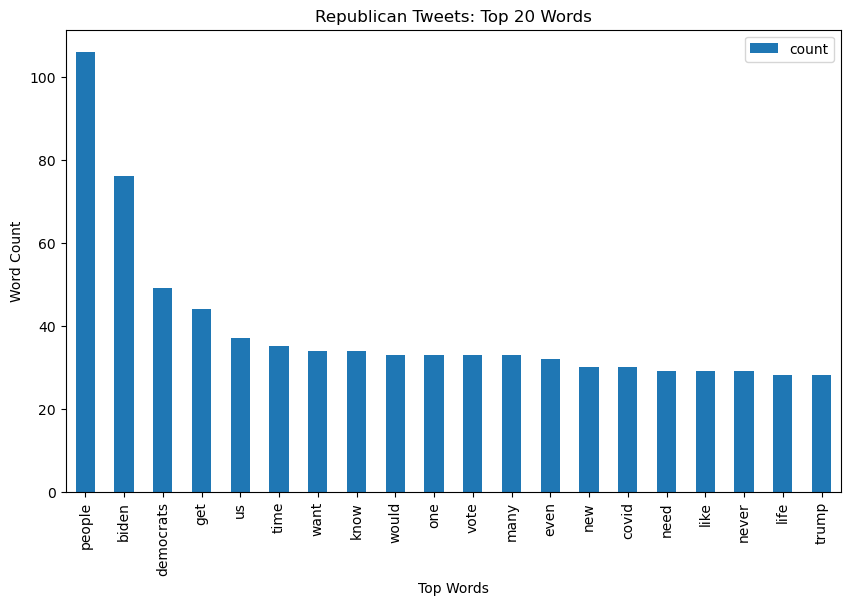

In [76]:
repub_words_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Word Count',xlabel='Top Words', 
                    title='Republican Tweets: Top 20 Words')

# Most Popular Words: Democratic

In [77]:
dem_freqdist = FreqDist()

for word in dem_data_tokenized_string:
    dem_freqdist[word]+=1  

In [78]:
dem_top_words = dem_freqdist.most_common(20) 

In [79]:
columns = ['word', 'count']

dem_words_df = pd.DataFrame(dem_top_words,columns = columns) 

In [80]:
#dem_words_df

<AxesSubplot:title={'center':'Democratic Tweets: Top 20 Words'}, xlabel='Top Words', ylabel='Word Count'>

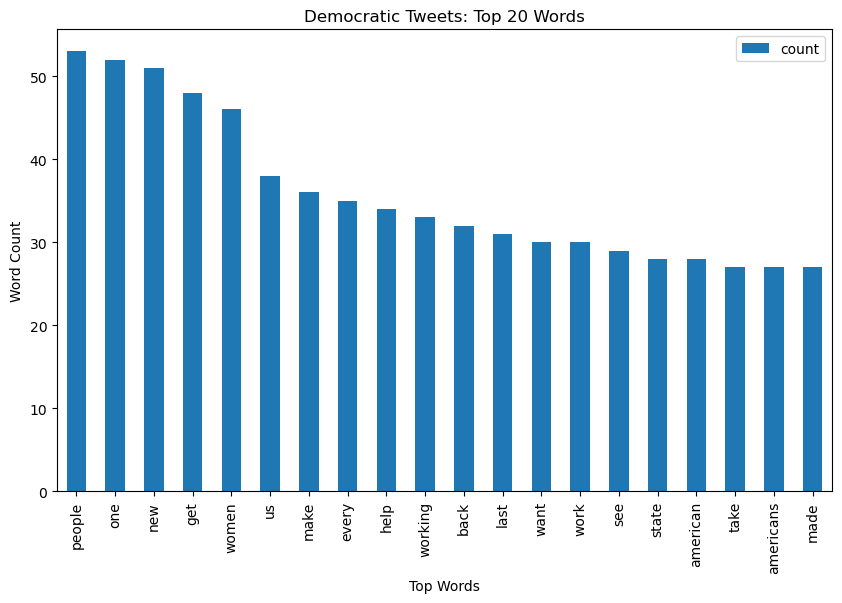

In [81]:
dem_words_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Word Count',xlabel='Top Words', 
                    title='Democratic Tweets: Top 20 Words')

# Analysis 2: Text Patterns

First lets add our Text Patterns function

In [82]:
def get_patterns(text)  :
    """
        This function takes text as an input and returns a dictionary of statistics,
        after cleaning the text. 
    
    """
    
    # We'll make things a big clearer by initializing the 
    # statistics here. These are placeholder values.
    total_tokens = 0
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_10 = Counter()
    
    # Do your tokenization and normalization here
    
    text = [w.lower() for w in text.split() if w.lower() not in sw and w.isalpha()]
    
    
    
    # Calculate your statistics here
    total_tokens = len(text)
    unique_tokens = len(set(text))
    avg_token_len = sum(len(w) for w in text) / len(text)
    lex_diversity = unique_tokens/total_tokens
    text_count= Counter(text)
    top_10 = text_count.most_common(10)
    
    
    # Now we'll fill out the dictionary. 
    
    results = {'tokens':total_tokens,
               'unique_tokens':unique_tokens,
               'avg_token_length':avg_token_len,
               'lexical_diversity':lex_diversity,
               'top_10':top_10}

    return(results)


# Republican Results

In [83]:
get_patterns(repub_data_string)

{'tokens': 8094,
 'unique_tokens': 2840,
 'avg_token_length': 6.0748702742772425,
 'lexical_diversity': 0.3508771929824561,
 'top_10': [('people', 106),
  ('biden', 76),
  ('democrats', 49),
  ('get', 44),
  ('us', 37),
  ('time', 35),
  ('want', 34),
  ('know', 34),
  ('would', 33),
  ('one', 33)]}

# Democratic Results

In [84]:
get_patterns(dem_data_string)

{'tokens': 7892,
 'unique_tokens': 2832,
 'avg_token_length': 6.2159148504815,
 'lexical_diversity': 0.35884439939178914,
 'top_10': [('people', 53),
  ('one', 52),
  ('new', 51),
  ('get', 48),
  ('women', 46),
  ('us', 38),
  ('make', 36),
  ('every', 35),
  ('help', 34),
  ('working', 33)]}

# Analysis 3: Parsing

First let's import our spacy package

In [85]:
import sqlite3
import spacy
from subject_object_extraction import findSVOs

In [86]:
## now let's set up our parser
parser = spacy.load('en_core_web_sm')

# Republican Parsing

In [87]:
republican_string = [w for w in repub_data_string if w.isalpha and w not in punct_set]
republican_string = ''.join(republican_string)

In [88]:
republican_string = parser(republican_string)

In [89]:
republican_svos = (findSVOs(republican_string))

In [90]:
count_republican = Counter(republican_svos)

# Republican Results: Most Common 20 SVOS

In [91]:
count_republican.most_common(20)

[(('it', '’s', 'time'), 3),
 (('there', 'is', 'nothing'), 3),
 (('i', 'told', 'trump'), 3),
 (('life', 'saving', 'treatments'), 3),
 (('order', 'switch', 'americans'), 3),
 (('they', 'called', 'you'), 3),
 (('weapon', 'persecute', 'enemies'), 2),
 (('republicans', 'focus', 'biden'), 2),
 (('antifa', 'afford', 'bricks'), 2),
 (('verdict', 'listen', 'pod'), 2),
 (('biden', 'give', 'to'), 2),
 (('tedcruzby', 'prosecute', 'predecessor'), 2),
 (('i', 'discuss', 'verdict'), 2),
 (('you', 'miss', 'episode'), 2),
 (('he', 'left', 'office'), 2),
 (('he', 'had', 'nothing'), 2),
 (('i', 'toured', 'jail'), 2),
 (('he', 'pardon', 'defendants'), 2),
 (('covid', 'masking', 'children'), 2),
 (('who', '!compromise', 'freedoms'), 2)]

# Democratic Parsing

In [92]:
democratic_string = [w for w in dem_data_string if w.isalpha and w not in punct_set]
democratic_string = ''.join(democratic_string)

In [93]:
democratic_string = parser(dem_data_string)

In [94]:
democratic_svos = (findSVOs(democratic_string))

In [95]:
count_democratic = Counter(democratic_svos)

# Democratic Results: Most Common 20 SVOS

In [96]:
count_democratic.most_common(20)

[(('i', 'deliver', 'remarks'), 8),
 (('you', 'have', 'chance'), 4),
 (('it', '’s', 'time'), 4),
 (('i', 'signed', 'law'), 3),
 (('it', 'take', 'time'), 3),
 (('it', '’s', 'hold'), 2),
 (('officials', 'block', 'it'), 2),
 (('letter', 'pardon', 'offenses'), 2),
 (('people', 'pay', '8'), 2),
 (('state', 'legalize', 'state'), 2),
 (('privilege', 'serving', 'you'), 2),
 (('privilege', 'serving', 'yo'), 2),
 (('it', '’s', 'day'), 2),
 (('@kathyhochul', 'have', 'support'), 2),
 (('changes', 'make', 'medicare'), 2),
 (('billionaire', 'sell', 'people'), 2),
 (('billionaire', 'sell', 'idea'), 2),
 (('power', 'belongs', '_'), 2),
 (('you', 'know', 'stuff'), 2),
 (('it', 'made', 'clear'), 2)]

# Analysis 4: Text Comparison

In [97]:
def compare_texts(corpus_1,corpus_2, num_words = 10, ratio_cutoff = 5):
    
    combined_dict1 = {}
    combined_dict2 = {}
    oneV2Dict = {}
    twoV1Dict = {}
    outputDict = {"one":combined_dict1,"two":combined_dict2,"one_vs_two": oneV2Dict,"two_vs_one":twoV1Dict}
    
    c = Counter()   
    total_tokens = 1
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_10 = Counter()
    
    #Clean corpus 1 and perform analysis
    c1_clean = [word for word in corpus_1]
    c1_clean = [word.lower() for word in c1_clean if word.isalpha() and word.lower() not in sw]        
    c.update(c1_clean)        
    total_tokens = len(c1_clean)
    unique_tokens = len(set(c1_clean))
    lex_diversity = (unique_tokens/total_tokens)       
    token_len = [len(word) for word in c1_clean]    
    avg_token_len = np.mean(token_len)
    top_10 = c.most_common(10)
    
    combined_dict1 = {'tokens':total_tokens,
                'unique_tokens':unique_tokens,
                'avg_token_length':avg_token_len,
                'lexical_diversity':lex_diversity,
                'top_words':top_10}
    
    #Clean corpus 2 and perform analysis
    c2_clean = [word for word in corpus_2]
    c2_clean = [word.lower() for word in c2_clean if word.isalpha() and word.lower() not in sw]
    
    c.update(c2_clean) 
    total_tokens = len(c2_clean)
    unique_tokens = len(set(c2_clean))
    lex_diversity = (unique_tokens/total_tokens)    
    token_len = [len(word) for word in c2_clean]    
    avg_token_len = np.mean(token_len)
    top_10 = c.most_common(10)

    combined_dict2 = {'tokens':total_tokens,
                'unique_tokens':unique_tokens,
                'avg_token_length':avg_token_len,
                'lexical_diversity':lex_diversity,
                'top_words':top_10}
    
    freq1 = nltk.FreqDist(c1_clean)
    freq2 = nltk.FreqDist(c2_clean)
    
    #Create and fill concentration dictionary for each corpus, taking cutoff into account
    corpus_one_concentration = defaultdict(float)
    corpus_two_concentration = defaultdict(float)
    
    for word, freq in freq1.items():
        corpus_one_concentration[word] = freq/len(c1_clean)
    
    for word, freq in freq2.items():
        corpus_two_concentration[word] = freq/len(c2_clean)
                
    oneV2Dict = {}
    twoV1Dict = {}
    
    for word in corpus_one_concentration:
        if ratio_cutoff > freq1[word] or ratio_cutoff > freq2[word]:
            continue
        ratio1 = corpus_one_concentration[word]/corpus_two_concentration[word] 
        
        oneV2Dict[word] = ratio1
    
    for word in corpus_two_concentration:
        if ratio_cutoff > freq1[word] or ratio_cutoff > freq2[word]:
            continue
        ratio2 = corpus_two_concentration[word]/corpus_one_concentration[word] 
        
        twoV1Dict[word] = ratio2
    
    #Fill results dictionary with analysis and comparison.
    outputDict = {"Republican":combined_dict1,"Democrat":combined_dict2,"Republican_vs_Democrat": sorted(oneV2Dict.items(), key = lambda item:item[1], reverse = True)[:num_words],"Democrat_vs_Republican":sorted(twoV1Dict.items(), key = lambda item:item[1], reverse = True)[:num_words]}
    print(outputDict)

In [98]:
compare_texts(repub_data_tokenized_string, dem_data_tokenized_string)

{'Republican': {'tokens': 8054, 'unique_tokens': 2836, 'avg_token_length': 6.0862925254531905, 'lexical_diversity': 0.3521231686118699, 'top_words': [('people', 106), ('biden', 76), ('democrats', 49), ('get', 44), ('us', 37), ('time', 35), ('want', 34), ('know', 34), ('would', 33), ('one', 33)]}, 'Democrat': {'tokens': 7892, 'unique_tokens': 2832, 'avg_token_length': 6.2159148504815, 'lexical_diversity': 0.35884439939178914, 'top_words': [('people', 159), ('get', 92), ('one', 85), ('new', 81), ('biden', 78), ('us', 75), ('want', 64), ('democrats', 60), ('vote', 59), ('every', 58)]}, 'Republican_vs_Democrat': [('trump', 5.487360317854482), ('democrats', 4.364945707384247), ('vaccine', 3.9195430841817736), ('white', 3.5275887757635958), ('life', 3.429600198659051), ('leadership', 3.3596083578700915), ('political', 3.10297160831057), ('stop', 2.93965731313633), ('covid', 2.9396573131363297), ('never', 2.8416687360317856)], 'Democrat_vs_Republican': [('women', 7.824041223179591), ('made', 